In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data=pd.read_csv('heart.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: >

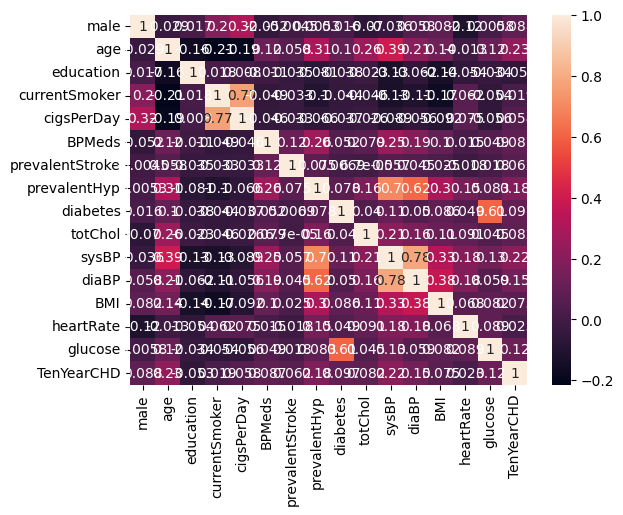

In [25]:
sns.heatmap(data.corr(),annot=True)

In [16]:
X=data.drop('TenYearCHD',axis=1)
y=data['TenYearCHD']
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [17]:
# # Data preprocessing
# numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [19]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# data=pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data = data.fillna(data.mean())

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
3748     0   60        1.0              0         0.0     0.0   
1928     0   42        3.0              1        20.0     0.0   
2058     1   60        2.0              1        20.0     0.0   
2106     1   67        3.0              0         0.0     0.0   
3103     0   51        1.0              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
1033     0   44        2.0              0         0.0     0.0   
3264     0   51        1.0              1         2.0     0.0   
1653     1   39        3.0              1        20.0     0.0   
2607     0   57        1.0              0         0.0     0.0   
2732     0   40        2.0              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3748                0             0         0    275.0  134.0   74.0  19.91   
1928                0             0         0    193.0  129.0

In [21]:
from sklearn.impute import SimpleImputer
# Create an imputer transformer that will fill NaN values with the mean
imputer = SimpleImputer(strategy="mean")

# Fit the imputer to the training data
imputer.fit(X_train)

# Transform the training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [23]:
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = gnb.predict(X_test)

In [24]:
# Calculate the accuracy of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8160377358490566
